In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import xarray as xr
from netCDF4 import Dataset
import xarray as xr
import os
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from scipy import stats
import geocat.viz.util as gvutil
import cmaps as gvcmaps
from geocat.comp import eofunc_eofs, eofunc_pcs
from sklearn.cross_decomposition import CCA
#import geocat.datafiles as gdf
import geocat.viz as gv
import cdo
import matplotlib.colors as colors
import matplotlib.patches as mpatch
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import tabulate

***Data***

Source of the data: https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-monthly-means?tab=overview

***Anomalies***

Towards performing the analyses presented in this script the following treatment is applied to all data sets. First, the annual cycle is removed from the original time series. Second, monthly anomalies are calculated relative to the 1980 – 2010 period. Thereafter, annual or seasonal means are computed.

In [2]:
from cdo import *
cdo = Cdo()

***Perfom CCA on annual SST-SIC anomalies***

In [3]:
# open the two datasets, reconstructed based on 8EOFS and their asociated PCs

field1 = 'SST_rec8EOF19502023_ok.nc'
ds1 = xr.open_dataset(field1)
#print(ds1)

field2 = 'SIC_ERA5_rec8EOF19502023.nc'
ds2= xr.open_dataset(field2)
#print(ds2)

PCsV1=pd.read_csv('RezEOF.PC.sst.obs.19502023.8pcs.normalized.txt',sep=',')
PCsV1_xr=PCsV1.to_xarray().to_array()
PCsSST=PCsV1[['0','1','2','3','4','5','6','7']]

PCsV2=pd.read_csv('RezEOF.SIC.19502023.8PCs.normalized.txt',sep=',')
PCsV2_xr=PCsV2.to_xarray().to_array()
PCsSIC=PCsV2[['0','1','2','3','4','5','6','7']]
#X2

In [4]:
#Normalize the PCs (if necesary) 
X1_mc = (PCsSST-PCsSST.mean())/(PCsSST.std())
#X1_mc.head()
X2_mc = (PCsSIC-PCsSIC.mean())/(PCsSIC.std())
#X2_mc.head()

In [5]:
#Perform CCA 

ca = CCA(n_components=8)
ca.fit(X1_mc, X2_mc)
X_c, Y_c = ca.transform(X1_mc, X2_mc)

#export the pairs of maximum correlated PCs obtained from CCA

cc_res = pd.DataFrame({"CCX_1":X_c[:, 0],
                       "CCY_1":Y_c[:, 0],
                       "CCX_2":X_c[:, 1],
                       "CCY_2":Y_c[:, 1],
                       "CCX_3":X_c[:, 2],
                       "CCY_3":Y_c[:, 2],
                       "CCX_4":X_c[:, 3],
                       "CCY_4":Y_c[:, 3],
                        "CCX_5":X_c[:, 4],
                        "CCY_5":Y_c[:, 4],
                        "CCX_6":X_c[:, 5],
                         "CCY_6":Y_c[:, 5],
                         "CCX_7":X_c[:, 6],
                         "CCY_7":Y_c[:, 6],
                         "CCX_8":X_c[:, 7],
                         "CCY_8":Y_c[:, 7],
                       #"Species":df.species.tolist(),
                      })
# cc_res.head()

In [6]:
#plot the corelatio coefficients betweent the PCs
CCAresultPccorr=[]
for p in range (np.shape(X_c)[1]):
        print(np.corrcoef(X_c[:, p], Y_c[:, p]))

[[1.         0.96669549]
 [0.96669549 1.        ]]
[[1.         0.91479797]
 [0.91479797 1.        ]]
[[1.         0.81689056]
 [0.81689056 1.        ]]
[[1.         0.63596207]
 [0.63596207 1.        ]]
[[1.         0.55212596]
 [0.55212596 1.        ]]
[[1.         0.31572693]
 [0.31572693 1.        ]]
[[1.         0.24459596]
 [0.24459596 1.        ]]
[[1.         0.00667886]
 [0.00667886 1.        ]]


In [7]:
#select the first 10 individual pcs 
rezcca=cc_res.to_xarray()
PC1sst=rezcca['CCX_1']
PC1sic=rezcca['CCY_1']
PC2sst=rezcca['CCX_2']
PC2sic=rezcca['CCY_2']
PC3sst=rezcca['CCX_3']
PC3sic=rezcca['CCY_3']
PC4sst=rezcca['CCX_4']
PC4sic=rezcca['CCY_4']
PC5sst=rezcca['CCX_5']
PC5sic=rezcca['CCY_5']
PC6sst=rezcca['CCX_6']
PC6sic=rezcca['CCY_6']
PC7sst=rezcca['CCX_7']
PC7sic=rezcca['CCY_7']
PC8sst=rezcca['CCX_8']
PC8sic=rezcca['CCY_8']


#reindex the time axis in the PCs

PC1sst= PC1sst.rename({"index": "time"})
PC2sst= PC2sst.rename({"index": "time"})
PC3sst= PC3sst.rename({"index": "time"})
PC4sst= PC4sst.rename({"index": "time"})
PC5sst= PC5sst.rename({"index": "time"})
PC6sst= PC6sst.rename({"index": "time"})
PC7sst= PC7sst.rename({"index": "time"})
PC8sst= PC8sst.rename({"index": "time"})

PC1sic= PC1sic.rename({"index": "time"})
PC2sic= PC2sic.rename({"index": "time"})
PC3sic= PC3sic.rename({"index": "time"})
PC4sic= PC4sic.rename({"index": "time"})
PC5sic= PC5sic.rename({"index": "time"})
PC6sic= PC6sic.rename({"index": "time"})
PC7sic= PC7sic.rename({"index": "time"})
PC8sic= PC8sic.rename({"index": "time"})

PC1sst['time'] = ds1.time
PC2sst['time'] = ds1.time
PC3sst['time'] = ds1.time
PC4sst['time'] = ds1.time
PC5sst['time'] = ds1.time
PC6sst['time'] = ds1.time
PC7sst['time'] = ds1.time
PC8sst['time'] = ds1.time


PC1sic['time'] = ds2.time
PC2sic['time'] = ds2.time
PC3sic['time'] = ds2.time
PC4sic['time'] = ds2.time
PC5sic['time'] = ds2.time
PC6sic['time'] = ds2.time
PC7sic['time'] = ds2.time
PC8sic['time'] = ds2.time


In [8]:
#Obtain the associated spatial structures trough linear regression analisis of reconstructed SST/SIC fields on the CCA time series from each pair

regSST1 = xr.cov(PC1sst.load(), ds1.sst.load(), dim="time")/PC1sst.var(dim='time',skipna=True).values
regSST2 = xr.cov(PC2sst.load(), ds1.sst.load(), dim="time")/PC2sst.var(dim='time',skipna=True).values
regSST3 = xr.cov(PC3sst.load(), ds1.sst.load(), dim="time")/PC3sst.var(dim='time',skipna=True).values
regSST4 = xr.cov(PC4sst.load(), ds1.sst.load(), dim="time")/PC4sst.var(dim='time',skipna=True).values
regSST5 = xr.cov(PC5sst.load(), ds1.sst.load(), dim="time")/PC5sst.var(dim='time',skipna=True).values
regSST6 = xr.cov(PC6sst.load(), ds1.sst.load(), dim="time")/PC6sst.var(dim='time',skipna=True).values
regSST7 = xr.cov(PC7sst.load(), ds1.sst.load(), dim="time")/PC7sst.var(dim='time',skipna=True).values
regSST8 = xr.cov(PC8sst.load(), ds1.sst.load(), dim="time")/PC8sst.var(dim='time',skipna=True).values

regSIC1 = xr.cov(PC1sic.load(), ds2.sic.load(), dim="time")/PC1sic.var(dim='time',skipna=True).values
regSIC2 = xr.cov(PC2sic.load(), ds2.sic.load(), dim="time")/PC2sic.var(dim='time',skipna=True).values
regSIC3 = xr.cov(PC3sic.load(), ds2.sic.load(), dim="time")/PC3sic.var(dim='time',skipna=True).values
regSIC4 = xr.cov(PC4sic.load(), ds2.sic.load(), dim="time")/PC4sic.var(dim='time',skipna=True).values
regSIC5 = xr.cov(PC5sic.load(), ds2.sic.load(), dim="time")/PC5sic.var(dim='time',skipna=True).values
regSIC6 = xr.cov(PC6sic.load(), ds2.sic.load(), dim="time")/PC6sic.var(dim='time',skipna=True).values
regSIC7 = xr.cov(PC7sic.load(), ds2.sic.load(), dim="time")/PC7sic.var(dim='time',skipna=True).values
regSIC8 = xr.cov(PC8sic.load(), ds2.sic.load(), dim="time")/PC8sic.var(dim='time',skipna=True).values


***PLOT and SAVE the time series for each Pair***

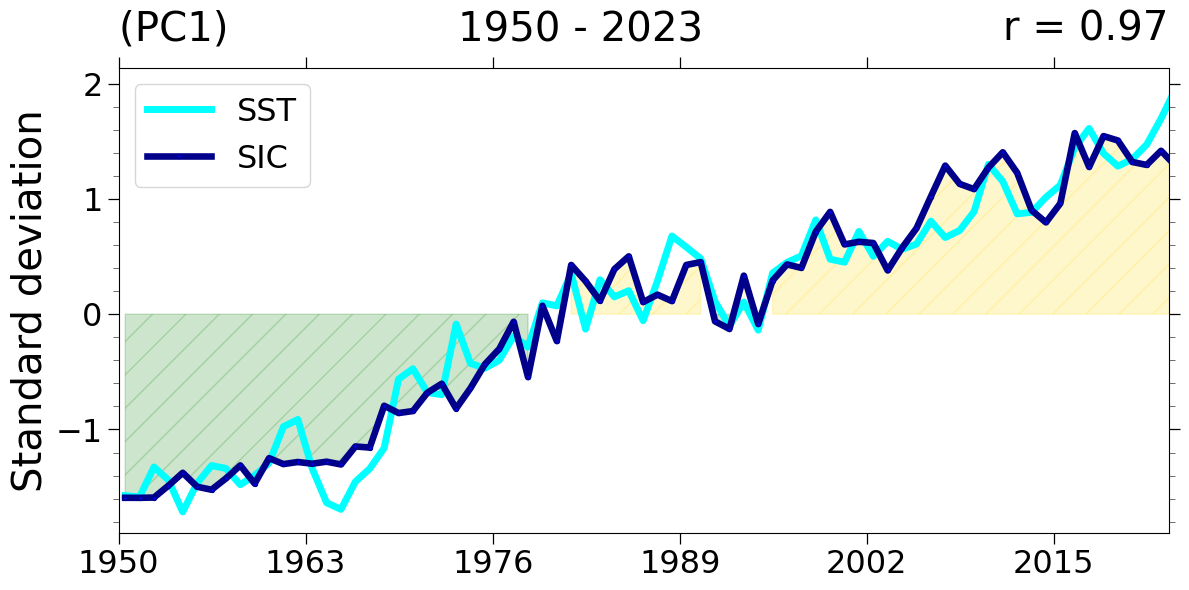

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Create the figure and axes objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Use geocat.viz.util convenience function to set axes tick values
gvutil.set_titles_and_labels(ax1,
                             lefttitle=f'(PC1)                  1950 - 2023',
                             lefttitlefontsize=29,
                             righttitle=f'r = 0.97',
                             righttitlefontsize=29,
                             xlabel="",
                             ylabel="Standard deviation",
                             labelfontsize=29)
gv.add_major_minor_ticks(ax1,
                         x_minor_per_major=1,
                         y_minor_per_major=5,
                         labelsize=23)

# Plot SST and SIC data
ax1.plot(ds1.time, PC1sst, color='aqua', linewidth=5, label='SST')
ax1.plot(ds1.time, PC1sic, marker='o', markerfacecolor='blue', markersize=2.8, color='darkblue', linewidth=4.75, label='SIC')
ax1.fill_between(ds1.time, PC1sic, where=PC1sic > 0, color='gold', alpha=0.2, hatch='/')
ax1.fill_between(ds1.time, PC1sic, where=PC1sic < 0, color='green', alpha=0.2, hatch='/')
ax1.legend(prop={"size": 23})

# Set x-axis limits and tick positions
ax1.set_xlim(pd.Timestamp('1950-01-01'), pd.Timestamp('2023-01-01'))
ax1.xaxis.set_major_locator(mdates.YearLocator(base=13))


# Adjust layout and display the plot

#plt.savefig("FCCA.PC1.pdf", format="pdf", bbox_inches='tight', dpi= 600)
#plt.savefig("CCA.PC1.jpg", format="jpg", bbox_inches='tight', dpi= 600)
plt.tight_layout()
plt.show()

In [10]:
#Save the two time series

PC1sst_data = PC1sic.values
time = PC1sst.time.values

# Extract year from the datetime64 objects
years = [t.astype('datetime64[Y]').astype(int) + 1970 for t in time]

# Create a pandas DataFrame with Year and Value columns
df = pd.DataFrame({'Year': years, 'Value': PC1sst_data})

# Save the DataFrame to an Excel file
df.to_excel('PC1.CO2.SIC.xlsx', index=False)

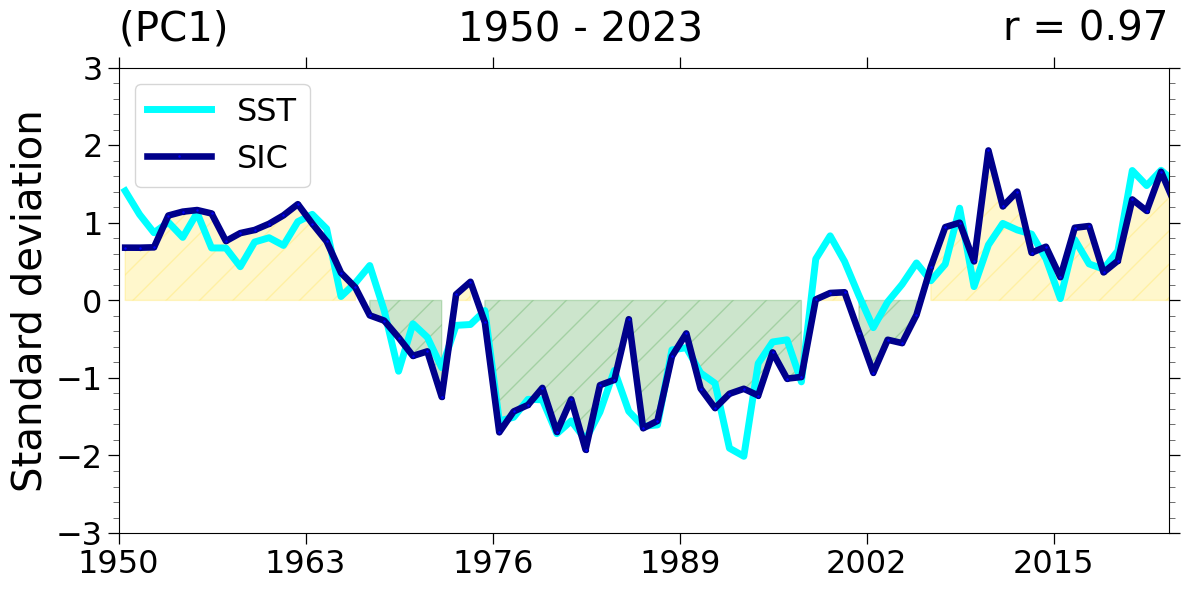

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create the figure and axes objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Use geocat.viz.util convenience function to set axes tick values
gvutil.set_titles_and_labels(ax1,
                             lefttitle=f'(PC1)                  1950 - 2023',
                             lefttitlefontsize=29,
                             righttitle=f'r = 0.97',
                             righttitlefontsize=29,
                             xlabel="",
                             ylabel="Standard deviation",
                             labelfontsize=29)
gv.add_major_minor_ticks(ax1,
                         x_minor_per_major=1,
                         y_minor_per_major=5,
                         labelsize=23)

# Plot SST and SIC data
ax1.plot(ds1.time, -PC2sst, color='aqua', linewidth=5, label='SST')
ax1.plot(ds1.time, -PC2sic, marker='o', markerfacecolor='blue', markersize=2.8, color='darkblue', linewidth=4.75, label='SIC')
ax1.fill_between(ds1.time, -PC2sic, where=-PC2sic > 0, color='gold', alpha=0.2, hatch='/')
ax1.fill_between(ds1.time, -PC2sic, where=-PC2sic < 0, color='green', alpha=0.2, hatch='/')
ax1.set_ylim(-3, 3)  # Adjust the limits as needed
ax1.legend(prop={"size": 23})

# Set x-axis limits and tick positions
ax1.set_xlim(pd.Timestamp('1950-01-01'), pd.Timestamp('2023-01-01'))
ax1.xaxis.set_major_locator(mdates.YearLocator(base=13))


# Adjust layout and display the plot


plt.tight_layout()
plt.show()

In [12]:
#Save the two time series

PC2sst_data = PC2sic.values*-1
time = PC2sst.time.values

# Extract year from the datetime64 objects
years = [t.astype('datetime64[Y]').astype(int) + 1970 for t in time]

# Create a pandas DataFrame with Year and Value columns
df = pd.DataFrame({'Year': years, 'Value': PC2sst_data})

# Save the DataFrame to an Excel file
df.to_excel('PC2.AMO.SIC.xlsx', index=False)

In [13]:
#Save the two time series

# Assuming 'PC2sst' contains your xarray.DataArray object
PC2sst_data = PC2sst.values*-1
time = PC2sst.time.values

# Extract year from the datetime64 objects
years = [t.astype('datetime64[Y]').astype(int) + 1970 for t in time]

# Create a pandas DataFrame with Year and Value columns
df = pd.DataFrame({'Year': years, 'Value': PC2sst_data})

# Save the DataFrame to an Excel file
df.to_excel('PC2.AMO.SST.xlsx', index=False)

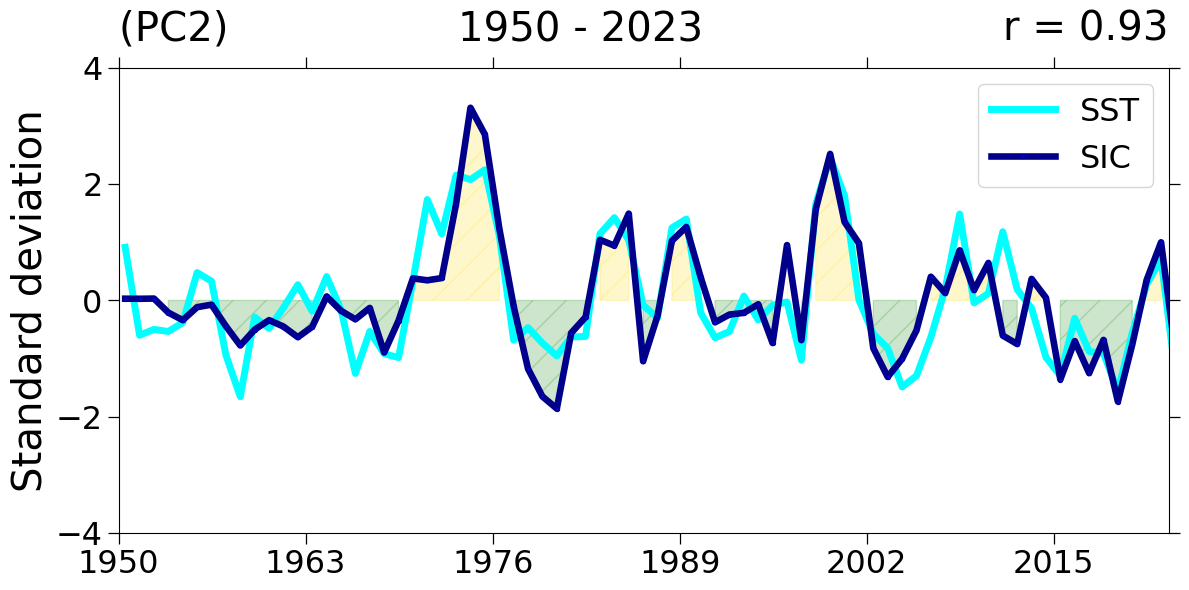

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create the figure and axes objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Use geocat.viz.util convenience function to set axes tick values
gvutil.set_titles_and_labels(ax1,
                             lefttitle=f'(PC2)                  1950 - 2023',
                             lefttitlefontsize=29,
                             righttitle=f'r = 0.93',
                             righttitlefontsize=29,
                             xlabel="",
                             ylabel="Standard deviation",
                             labelfontsize=29)
gv.add_major_minor_ticks(ax1,
                         x_minor_per_major=1,
                         y_minor_per_major=1,
                         labelsize=23)

# Plot SST and SIC data
ax1.plot(ds1.time, -PC3sst, color='aqua', linewidth=5, label='SST')
ax1.plot(ds1.time, -PC3sic, marker='o', markerfacecolor='blue', markersize=2.8, color='darkblue', linewidth=4.75, label='SIC')
ax1.fill_between(ds1.time,-PC3sic, where=-PC3sic > 0, color='gold', alpha=0.2, hatch='/')
ax1.fill_between(ds1.time, -PC3sic, where=-PC3sic < 0, color='green', alpha=0.2, hatch='/')
ax1.set_ylim(-4, 4)  # Adjust the limits as needed
ax1.legend(prop={"size": 23})

# Set x-axis limits and tick positions
ax1.set_xlim(pd.Timestamp('1950-01-01'), pd.Timestamp('2023-01-01'))
ax1.xaxis.set_major_locator(mdates.YearLocator(base=13))



# Adjust layout and display the plot

plt.tight_layout()
plt.show()

In [15]:
#Save the two time series

# Assuming 'PC2sst' contains your xarray.DataArray object
PC3sst_data = PC3sic.values*-1
time = PC3sst.time.values

# Extract year from the datetime64 objects
years = [t.astype('datetime64[Y]').astype(int) + 1970 for t in time]

# Create a pandas DataFrame with Year and Value columns
df = pd.DataFrame({'Year': years, 'Value': PC3sst_data})

# Save the DataFrame to an Excel file
df.to_excel('PC3.IPO.SIC.xlsx', index=False)

In [16]:
#Save the two time series

# Assuming 'PC2sst' contains your xarray.DataArray object
PC3sst_data = PC3sst.values*-1
time = PC3sst.time.values

# Extract year from the datetime64 objects
years = [t.astype('datetime64[Y]').astype(int) + 1970 for t in time]

# Create a pandas DataFrame with Year and Value columns
df = pd.DataFrame({'Year': years, 'Value': PC3sst_data})

# Save the DataFrame to an Excel file
df.to_excel('PC3.IPO.SST.xlsx', index=False)

***Compozite Analysis***
This script is applied to 2m Temperature data and can also be used for Z850 filed

In [17]:
# Load the dataset
fnc_a2 = '/isibhv/projects/paleo_work/petruv/Data/ERA5_1940_2023/T2M/anm_anom_T2M_ERA5_1950_2023.nc'
dsg_a2 = xr.open_dataset(fnc_a2)
print(dsg_a2)

<xarray.Dataset> Size: 307MB
Dimensions:    (time: 74, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 592B 1950-06-16 1951-06-16 ... 2023-06-16
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1kB ...
    t2m        (time, latitude, longitude) float32 307MB ...
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Jun 24 11:50:10 2024: cdo -O -s -yearmonmean /isibhv/pr...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...


***For the first CCA pair the differnce (2000–2023) minus (1950–1970) is calculated istead of composite maps***

In [18]:
# Select the variable
t2m = dsg_a2['t2m']

# Subset for Antarctic region: latitudes from -90 to -40
t2m_antarctica = t2m.sel(latitude=slice(-40, -90))

# Subset the two periods
t2m_early = t2m_antarctica.sel(time=slice("1950", "1970"))
t2m_late = t2m_antarctica.sel(time=slice("2000", "2023"))

# Compute the climatological mean for both periods
mean_early = t2m_early.mean(dim="time")
mean_late = t2m_late.mean(dim="time")

# Compute the anomaly (difference)
anomaly = mean_late - mean_early

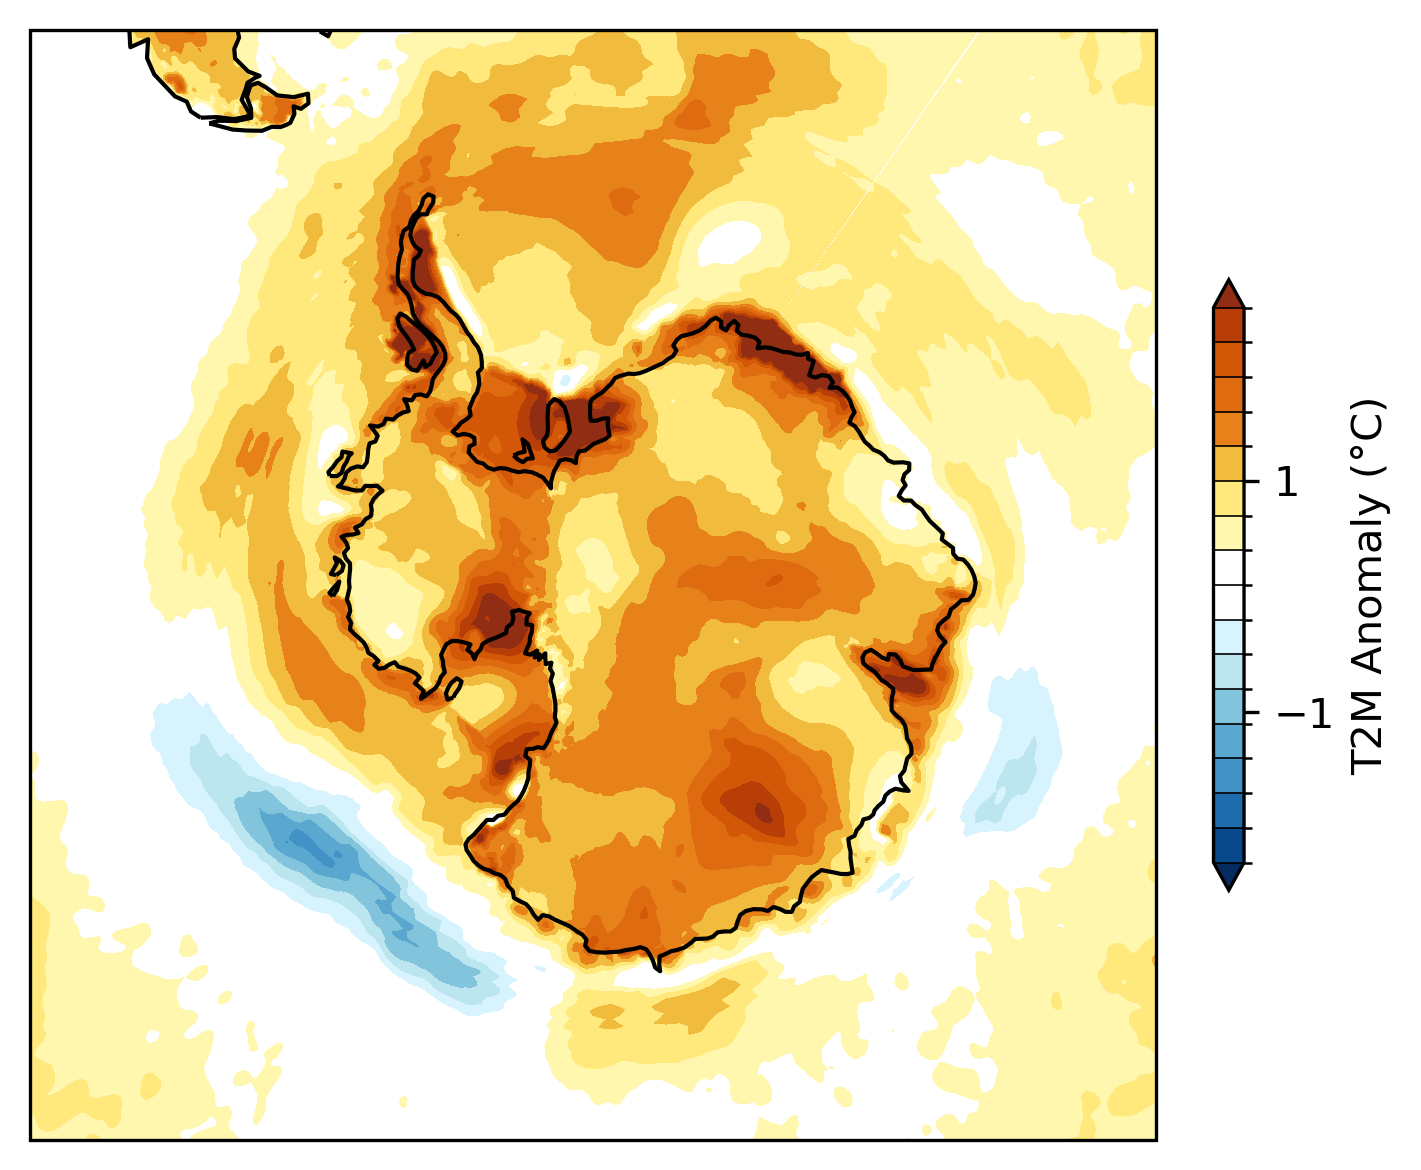

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors as mcolors


# Define color levels
level_min = -2
level_max = 2
stepsize = 0.3
levels = np.arange(level_min - stepsize / 1, level_max + stepsize / 1 + stepsize, stepsize)

# Create custom colormap from gvcmaps.BlueYellowRed
newcmp = gvcmaps.BlueYellowRed
index = [5, 20, 35, 50, 65, 85, 95, 110, 125, 0, 0, 135, 150, 165, 180, 200, 210, 220, 235, 250]
color_list = [newcmp[i].colors for i in index]
color_list[9] = [1., 1., 1.]   # Force white at center
color_list[10] = [1., 1., 1.]
cmap = mcolors.ListedColormap(color_list)

# Plotting
fig, ax = plt.subplots(figsize=(8, 4), dpi=300,
                       subplot_kw={"projection": ccrs.SouthPolarStereo(central_longitude=-35)})

# Set map extent: full longitudes, latitudes from -90 to -55
ax.set_extent([0, 360, -90, -55], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.set_title("Antarctic T2M Anomaly: (2000–2023) minus (1950–1970)", fontsize=11)


cf = anomaly.plot.contourf(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    levels=levels,
    vmin=level_min - 0.05,
    vmax=level_max + 0.05,
    extend='both',
    cbar_kwargs={
        'label': 'T2M Anomaly (°C)',
        'ticks': np.arange(level_min + 1, level_max, 2),
        'drawedges': True,
        'orientation': 'vertical',
        'pad': 0.025,
        'shrink': 0.55,
        'aspect': 20,
    }
)
plt.savefig("Figure_1f_ERA5_CCA5_T2M_Diff_Map.jpg", bbox_inches = 'tight', dpi= 600)
plt.tight_layout()
plt.show()

***Save the difference map to be used in comparison with CMIP outputs***

In [20]:
# Rename the variable to "T2M"
anomaly.name = "T2M"

# Create a new dataset
anomaly_ds = anomaly.to_dataset()

# Copy attributes from original dataset if desired
anomaly_ds["T2M"].attrs = t2m.attrs  # copies units, long_name, etc.
anomaly_ds.attrs = dsg_a2.attrs  # optional: copy global attributes

# Save to NetCDF
output_path = "T2M_Diff_Map_CO2.nc"
anomaly_ds.to_netcdf(output_path)

***Pair 2 (AMO) composite map***

In [21]:
# === FILE PATHS ===
t2m_nc_path = "/isibhv/projects/paleo_work/petruv/Data/ERA5_1940_2023/T2M/anm_anom_T2M_ERA5_1950_2023.nc"
index_path = "PC2.AMO.SIC.xlsx"

# === STEP 1: LOAD INDEX ===
df = pd.read_excel(index_path)
threshold = 0.75 * df['Value'].std()

high_years = df[df['Value'] >= threshold]['Year'].astype(int).tolist()
low_years = df[df['Value'] <= -threshold]['Year'].astype(int).tolist()

# === STEP 2: LOAD TEMPERATURE DATA ===
ds = xr.open_dataset(t2m_nc_path)
t2m = ds['t2m']

# === STEP 3: SELECT ANTARCTIC REGION ===
t2m_antarctic = t2m.sel(latitude=slice(-40, -90)) 

# Extract years
years = t2m_antarctic['time.year']

# === STEP 4: COMPOSITE ANALYSIS ===
high_comp = t2m_antarctic.sel(time=years.isin(high_years)).mean(dim='time', skipna=True)
low_comp = t2m_antarctic.sel(time=years.isin(low_years)).mean(dim='time', skipna=True)
diff_comp = high_comp - low_comp

# Rename for saving/plotting
diff_comp.name = "T2M"


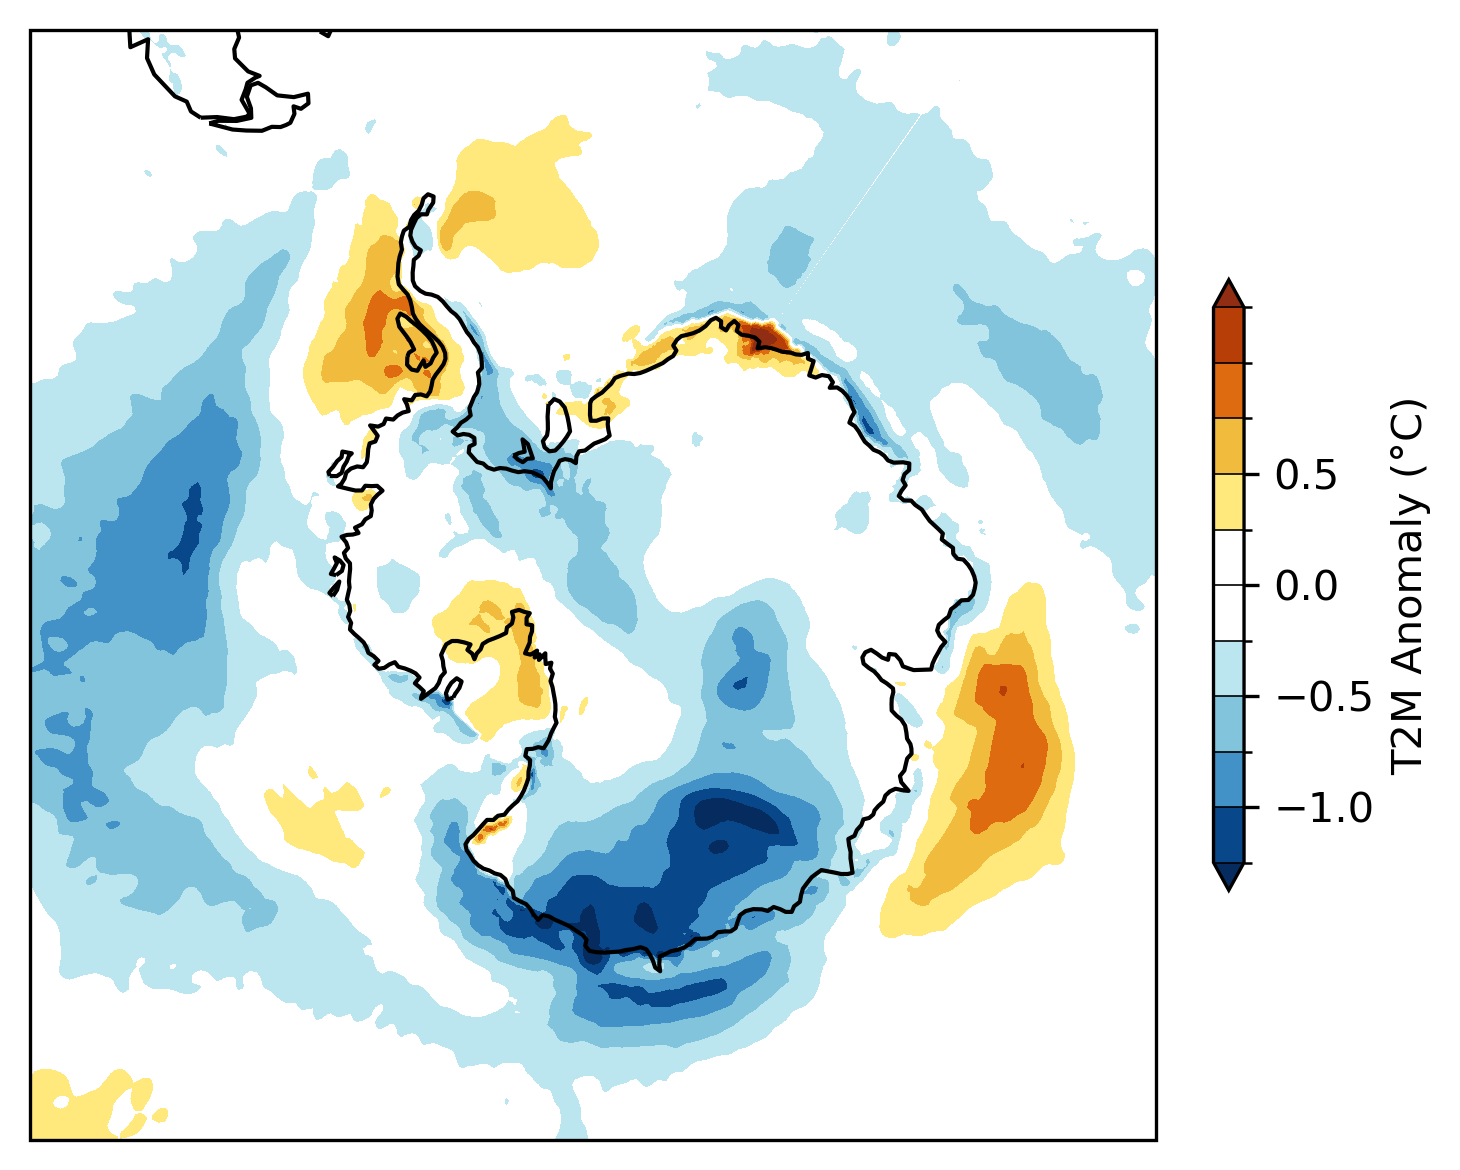

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors as mcolors


# Define color levels
level_min = -1
level_max = 1
stepsize = 0.25
levels = np.arange(level_min - stepsize / 1, level_max + stepsize / 1 + stepsize, stepsize)

# Create custom colormap from gvcmaps.BlueYellowRed
newcmp = gvcmaps.BlueYellowRed
index = [5, 20, 35, 50, 65, 85, 95, 110, 125, 0, 0, 135, 150, 165, 180, 200, 210, 220, 235, 250]
color_list = [newcmp[i].colors for i in index]
color_list[9] = [1., 1., 1.]   # Force white at center
color_list[10] = [1., 1., 1.]
cmap = mcolors.ListedColormap(color_list)

# Plotting
fig, ax = plt.subplots(figsize=(8, 4), dpi=300,
                       subplot_kw={"projection": ccrs.SouthPolarStereo(central_longitude=-35)})

# Set map extent: full longitudes, latitudes from -90 to -55
ax.set_extent([0, 360, -90, -55], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.set_title("Diff Composite Map: T2m - PC2", fontsize=11)

cf = diff_comp.plot.contourf(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    levels=levels,
    vmin=level_min,
    vmax=level_max,
    extend='both',
    cbar_kwargs={
        'label': 'T2M Anomaly (°C)',
        'ticks': np.arange(level_min, level_max, 0.5),
        'drawedges': True,
        'orientation': 'vertical',
        'pad': 0.025,
        'shrink': 0.55,
        'aspect': 20,
    }
)
plt.savefig("Figure_2f_ERA5_CCA5_T2M_Diff_Compoz_map.jpg", bbox_inches = 'tight', dpi= 600)
plt.tight_layout()
plt.show()

In [23]:
#Save composite map

diff_comp.name = "T2M"

# Create dataset and copy attributes from original T2M if needed
diff_ds = diff_comp.to_dataset()
diff_ds['T2M'].attrs = t2m.attrs  # Optional: copy variable attributes
diff_ds.attrs = ds.attrs  # Optional: copy global attributes

# Save to NetCDF
diff_ds.to_netcdf("T2M_diff_PC2_AMO_compoz.nc")

print("Saved: T2M_diff_composite_Antarctica.nc")

Saved: T2M_diff_composite_Antarctica.nc


***Pair 3 (IPO) composite map***

In [24]:
index_path = "PC3.IPO.SIC.xlsx"  # <- New index file

# === STEP 1: LOAD INDEX & INVERT ===
df = pd.read_excel(index_path)
df['Value'] = df['Value']  

threshold = 0.75 * df['Value'].std()
high_years = df[df['Value'] >= threshold]['Year'].astype(int).tolist()
low_years = df[df['Value'] <= -threshold]['Year'].astype(int).tolist()

# === STEP 2: LOAD TEMPERATURE DATA ===
ds = xr.open_dataset(t2m_nc_path)
t2m = ds['t2m']

# === STEP 3: SELECT ANTARCTIC REGION ===
t2m_antarctic = t2m.sel(latitude=slice(-40, -90))  # descending latitude

# Extract year from time
years = t2m_antarctic['time.year']

# === STEP 4: COMPOSITE ANALYSIS ===
high_comp = t2m_antarctic.sel(time=years.isin(high_years)).mean(dim='time', skipna=True)
low_comp = t2m_antarctic.sel(time=years.isin(low_years)).mean(dim='time', skipna=True)
diff_comp = high_comp - low_comp

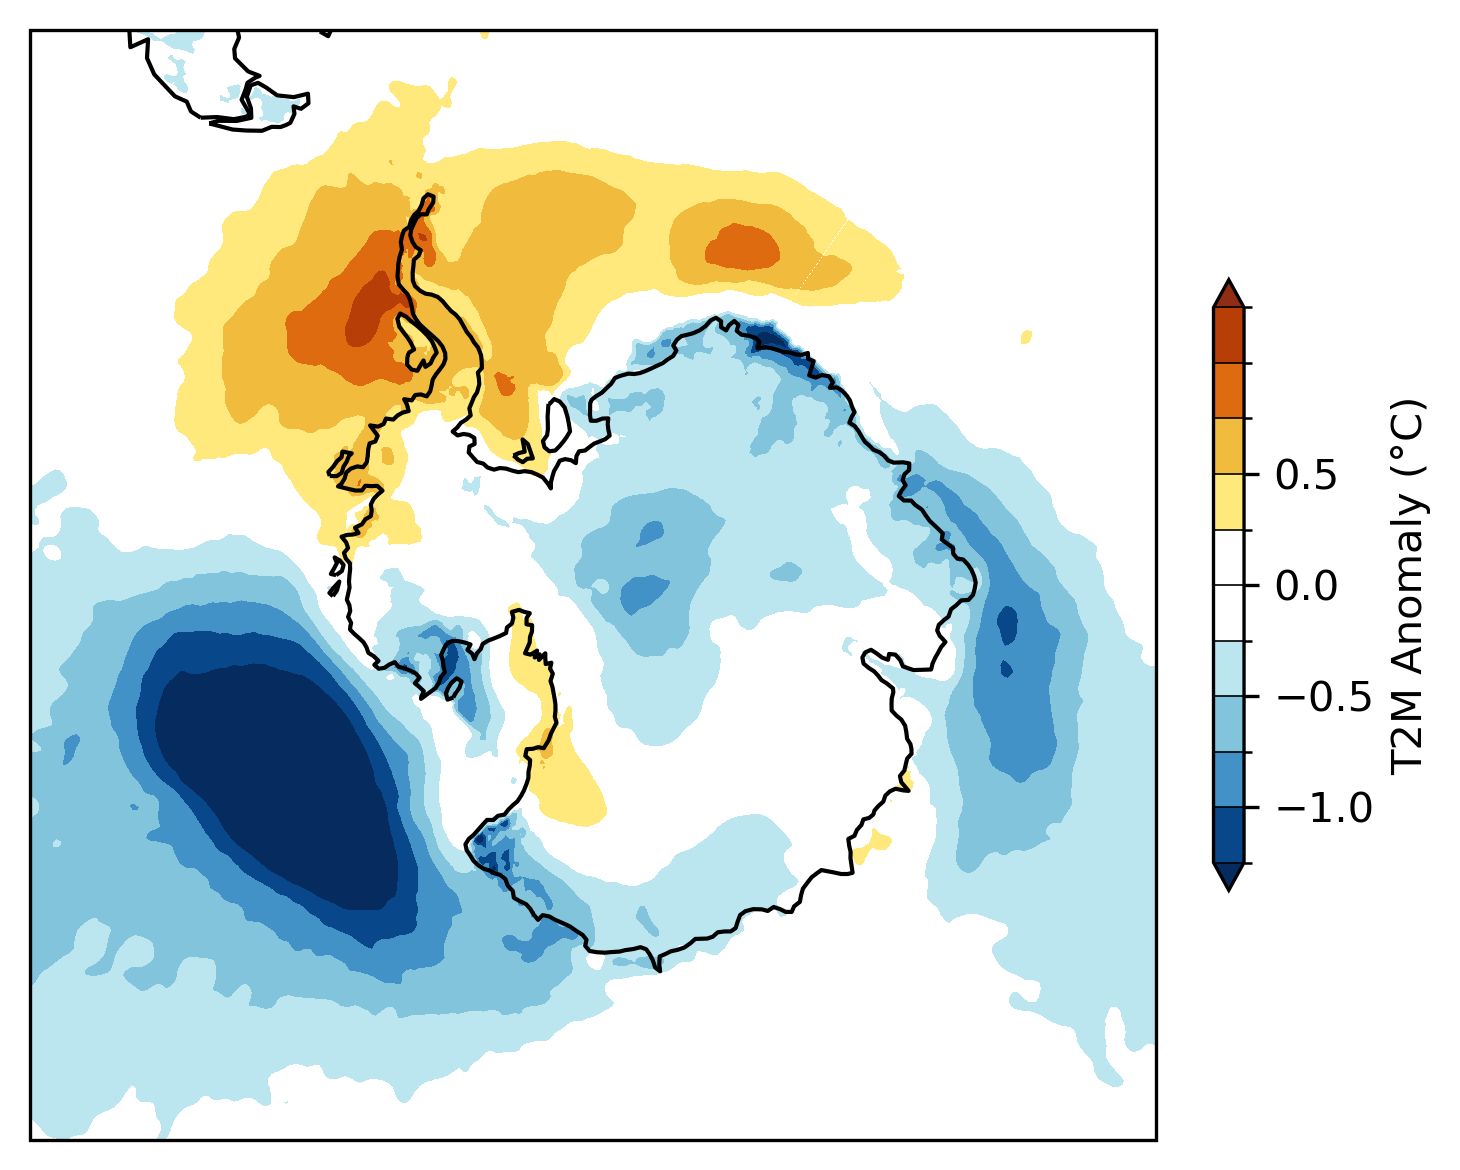

In [25]:
# Define color levels
level_min = -1
level_max = 1
#stepsize = 0.25
#levels = np.arange(level_min - stepsize / 1, level_max + stepsize / 1 + stepsize, stepsize)

# Create custom colormap from gvcmaps.BlueYellowRed
newcmp = gvcmaps.BlueYellowRed
index = [5, 20, 35, 50, 65, 85, 95, 110, 125, 0, 0, 135, 150, 165, 180, 200, 210, 220, 235, 250]
color_list = [newcmp[i].colors for i in index]
color_list[9] = [1., 1., 1.]   # Force white at center
color_list[10] = [1., 1., 1.]
cmap = mcolors.ListedColormap(color_list)

# Plotting
fig, ax = plt.subplots(figsize=(8, 4), dpi=300,
                       subplot_kw={"projection": ccrs.SouthPolarStereo(central_longitude=-35)})

# Set map extent: full longitudes, latitudes from -90 to -55
ax.set_extent([0, 360, -90, -55], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.set_title("Diff Composite Map: T2m - PC2", fontsize=11)

cf = diff_comp.plot.contourf(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    levels=levels,
    vmin=level_min,
    vmax=level_max,
    extend='both',
    cbar_kwargs={
        'label': 'T2M Anomaly (°C)',
        'ticks': np.arange(level_min, level_max, 0.5),
        'drawedges': True,
        'orientation': 'vertical',
        'pad': 0.025,
        'shrink': 0.55,
        'aspect': 20,
    }
)
plt.savefig("Figure_3f_ERA5_CCA5_T2M_Diff_Compoz_map_IPO.jpg", bbox_inches = 'tight', dpi= 600)
plt.tight_layout()
plt.show()

In [26]:
# SAVE TO .nc ===
diff_comp.name = "T2M"
diff_ds = diff_comp.to_dataset()
diff_ds['T2M'].attrs = t2m.attrs
diff_ds.attrs = ds.attrs
diff_ds.to_netcdf("T2M_diff_composite_Antarctica_PC3_IPO.nc")

print("Saved: T2M_diff_composite_Antarctica_PC3_IPO.nc")

Saved: T2M_diff_composite_Antarctica_PC3_IPO.nc
